In [10]:
# Install scikit-learn if not already installed
#Import libraries
import pandas as pd #For data manipulation and analysis
import os #For file and directory manipulation
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns #For statistical data visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder #For data preprocessing

In [11]:
# Define the file path
filepath = 'test.csv'  # Replace with the actual path to your CSV file

# Load the CSV file into a DataFrame
df_Test = pd.read_csv(filepath)

# Define the file path
filepath2 = 'train.csv'  # Replace with the actual path to your CSV file

# Load the CSV file into a DataFrame
df_Test2 = pd.read_csv(filepath)


In [12]:
df_Test['dataset_name'] = 'test'
df_Test2['dataset_name'] = 'train'
# Concatenate the two DataFrames
df = pd.concat([df_Test, df_Test2], ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,dataset_name
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            734 non-null    object 
 1   Gender             712 non-null    object 
 2   Married            734 non-null    object 
 3   Dependents         714 non-null    object 
 4   Education          734 non-null    object 
 5   Self_Employed      688 non-null    object 
 6   ApplicantIncome    734 non-null    int64  
 7   CoapplicantIncome  734 non-null    int64  
 8   LoanAmount         724 non-null    float64
 9   Loan_Amount_Term   722 non-null    float64
 10  Credit_History     676 non-null    float64
 11  Property_Area      734 non-null    object 
 12  dataset_name       734 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 74.7+ KB


 Checking & Removing Duplicates

In [14]:
#Dropping Duplicates on the original dataframe
df=df.drop_duplicates()
print (f"Results from checking & removing duplicates:{df.shape}") 

Results from checking & removing duplicates:(734, 13)


In [15]:
# Counting all missing values
print(df.isnull().sum())

Loan_ID               0
Gender               22
Married               0
Dependents           20
Education             0
Self_Employed        46
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       58
Property_Area         0
dataset_name          0
dtype: int64


Method 1 : Dropping Missing Values 

In [16]:
# Drop rows with missing values
df_dropped = df.dropna()

# Verify if all missing values are removed
print(df_dropped.isnull().sum())

# Display the shape of the DataFrame after dropping missing values
print(f"Dataset shape after dropping missing values: {df_dropped.shape}")


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64
Dataset shape after dropping missing values: (578, 13)


In [17]:
# Check dataset update after dropping missing values in the dataset
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            578 non-null    object 
 1   Gender             578 non-null    object 
 2   Married            578 non-null    object 
 3   Dependents         578 non-null    object 
 4   Education          578 non-null    object 
 5   Self_Employed      578 non-null    object 
 6   ApplicantIncome    578 non-null    int64  
 7   CoapplicantIncome  578 non-null    int64  
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     578 non-null    float64
 11  Property_Area      578 non-null    object 
 12  dataset_name       578 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 63.2+ KB


Method 2 Imputing Missing Values 

In [ ]:
# Get value counts for each category in the specified columns
#for col in columns_to_impute:
  #  print(f"Value counts for '{col}':")
   # print(df[col].value_counts(dropna=False))
    #print()

NameError: name 'columns_to_impute' is not defined

In [ ]:
df_imputed = df.copy()  # Create a copy of the original DataFrame for imputation

In [ ]:
# Counting all missing values
print(df_imputed.isnull().sum())

Loan_ID               0
Gender               22
Married               0
Dependents           20
Education             0
Self_Employed        46
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       58
Property_Area         0
dataset_name          0
dtype: int64


In [ ]:
# Calculate the ratio (proportion), percentage, and overall ratio of each category for the specified columns
columns_to_impute = ['Gender', 'Dependents', 'Self_Employed' , 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
total_rows = len(df)
for col in columns_to_impute:
    value_counts = df[col].value_counts(dropna=False)
    ratio = value_counts / value_counts.sum()  # Ratio among non-missing values
    percentage = ratio * 100
    overall_ratio = value_counts / total_rows  # Ratio over all rows (including missing)
    print(f"Statistics for '{col}':")
    stats_df = pd.DataFrame({
        'Count': value_counts,
        'Ratio (non-missing)': ratio.round(4),
        'Percentage (non-missing)': percentage.round(2),
    })
    print(stats_df)
    print()

# Impute missing values in df_imputed based on the observed ratios
for col in columns_to_impute:
    value_ratios = df[col].value_counts(normalize=True)
    missing_mask = df_imputed[col].isnull()
    if missing_mask.any():
        imputed_values = np.random.choice(
            value_ratios.index,
            size=missing_mask.sum(),
            p=value_ratios.values
        )
        df_imputed.loc[missing_mask, col] = imputed_values


Statistics for 'Gender':
        Count  Ratio (non-missing)  Percentage (non-missing)
Gender                                                      
Male      572               0.7793                     77.93
Female    140               0.1907                     19.07
NaN        22               0.0300                      3.00

Statistics for 'Dependents':
            Count  Ratio (non-missing)  Percentage (non-missing)
Dependents                                                      
0             400               0.5450                     54.50
2             118               0.1608                     16.08
1             116               0.1580                     15.80
3+             80               0.1090                     10.90
NaN            20               0.0272                      2.72

Statistics for 'Self_Employed':
               Count  Ratio (non-missing)  Percentage (non-missing)
Self_Employed                                                      
No              

In [ ]:

# Imputed DataFrame
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())


Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64


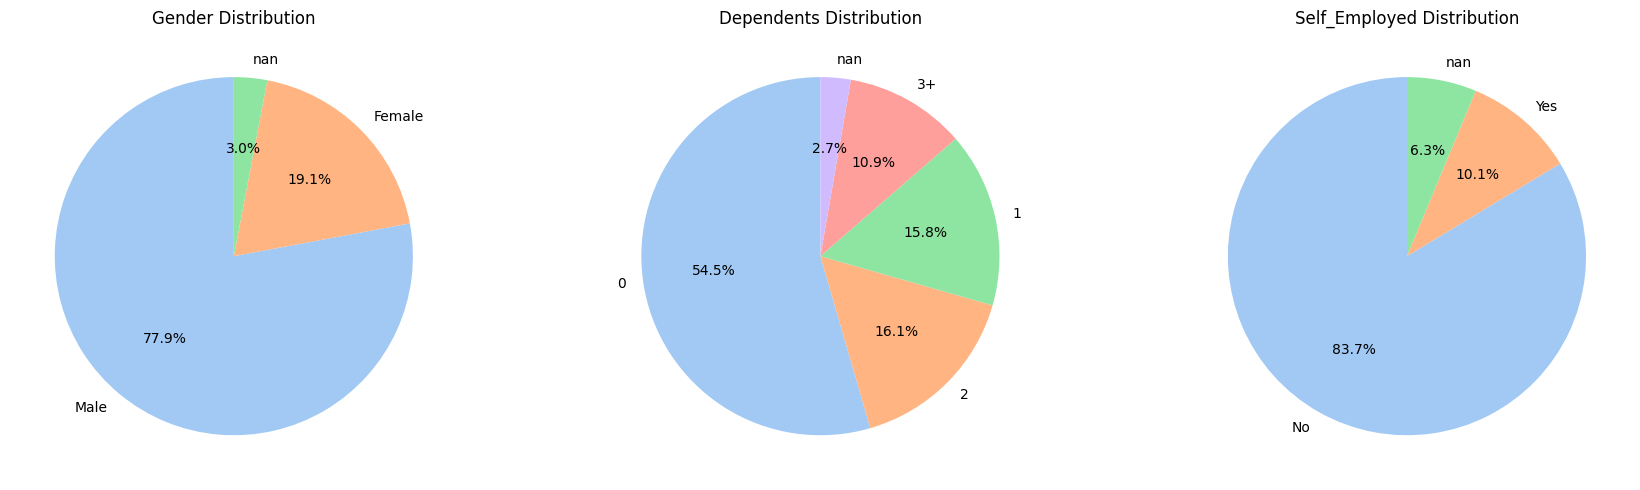

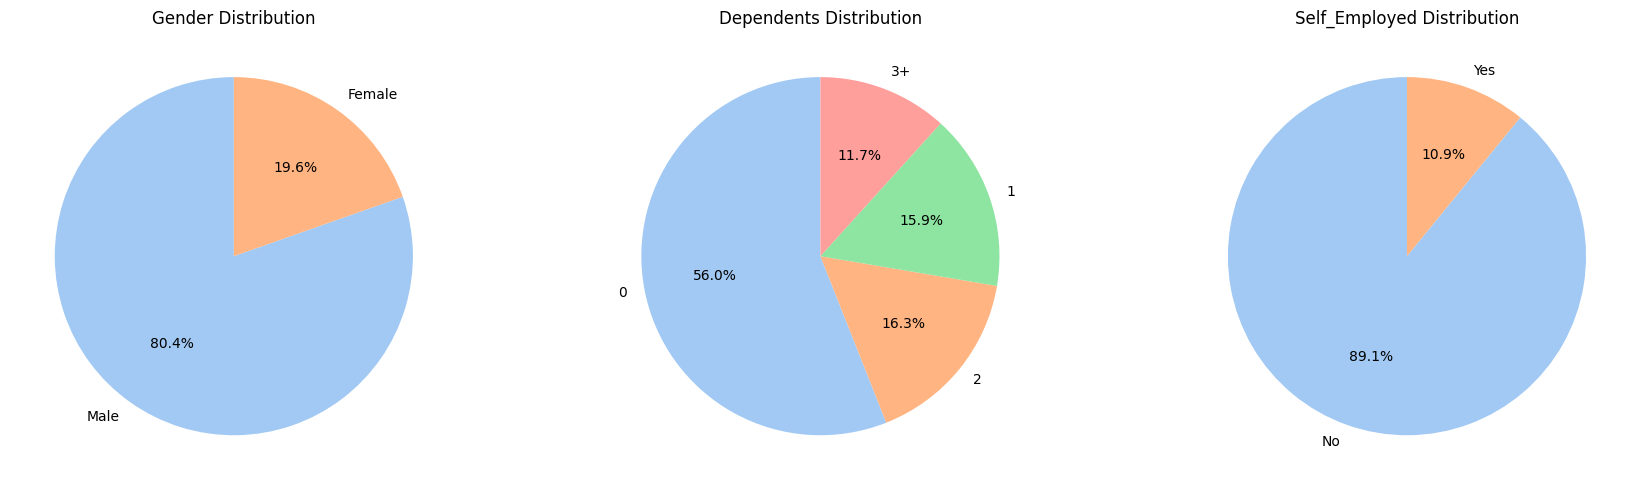

In [ ]:
# Pie charts for Gender, Dependents, Self_Employed distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
gender_counts = df['Gender'].value_counts(dropna=False)
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Gender Distribution')

# Dependents
dependents_counts = df['Dependents'].value_counts(dropna=False)
axes[1].pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Dependents Distribution')

# Self_Employed
self_employed_counts = df['Self_Employed'].value_counts(dropna=False)
axes[2].pie(self_employed_counts, labels=self_employed_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].set_title('Self_Employed Distribution')

plt.tight_layout()
plt.show()


#--------------------Imputed DataFrame-------------------

# Pie charts for Gender, Dependents, Self_Employed distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
gender_counts = df_imputed['Gender'].value_counts(dropna=False)
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Gender Distribution')

# Dependents
dependents_counts = df_imputed['Dependents'].value_counts(dropna=False)
axes[1].pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Dependents Distribution')

# Self_Employed
self_employed_counts = df_imputed['Self_Employed'].value_counts(dropna=False)
axes[2].pie(self_employed_counts, labels=self_employed_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].set_title('Self_Employed Distribution')

plt.tight_layout()
plt.show()

Method 3 Feature Engineering

In [ ]:
# Additional statistics for numerical columns
numerical_cols = ['LoanAmount', 'Loan_Amount_Term' , 'Credit_History']
print("\nSummary statistics for numerical columns:")
print(df[numerical_cols].describe())


Summary statistics for numerical columns:
       LoanAmount  Loan_Amount_Term  Credit_History
count  724.000000        722.000000      676.000000
mean   136.132597        342.537396        0.825444
std     61.324199         65.111443        0.379868
min     28.000000          6.000000        0.000000
25%    100.000000        360.000000        1.000000
50%    125.000000        360.000000        1.000000
75%    158.000000        360.000000        1.000000
max    550.000000        480.000000        1.000000


In [ ]:
df_FeatureEngineering = df.copy()
df_FeatureEngineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            734 non-null    object 
 1   Gender             712 non-null    object 
 2   Married            734 non-null    object 
 3   Dependents         714 non-null    object 
 4   Education          734 non-null    object 
 5   Self_Employed      688 non-null    object 
 6   ApplicantIncome    734 non-null    int64  
 7   CoapplicantIncome  734 non-null    int64  
 8   LoanAmount         724 non-null    float64
 9   Loan_Amount_Term   722 non-null    float64
 10  Credit_History     676 non-null    float64
 11  Property_Area      734 non-null    object 
 12  dataset_name       734 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 74.7+ KB


In [ ]:
# Feature engineering for missing values

# For 'Gender', create a new category 'Other' for missing values
df_FeatureEngineering['Gender'] = df_FeatureEngineering['Gender'].fillna('Other')

# For 'Dependents', create a new category '-1' for missing values
df_FeatureEngineering['Dependents'] = df_FeatureEngineering['Dependents'].fillna('-1')

# For 'Self_Employed', create a new category 'Other' for missing values
df_FeatureEngineering['Self_Employed'] = df_FeatureEngineering['Self_Employed'].fillna('Other')

# For 'LoanAmount', assign 0 to missing values
df_FeatureEngineering['LoanAmount'] = df_FeatureEngineering['LoanAmount'].fillna(0)

# For 'Loan_Amount_Term', assign 0 to missing values
df_FeatureEngineering['Loan_Amount_Term'] = df_FeatureEngineering['Loan_Amount_Term'].fillna(0)

# For 'Credit_History', assign -1 to missing values
df_FeatureEngineering['Credit_History'] = df_FeatureEngineering['Credit_History'].fillna(-1)

In [ ]:
# Verify if all missing values are handled
print(df_FeatureEngineering.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64
